##Importing the Depenedencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# **Data** **Exploration**

In [ ]:
data_set=pd.read_excel('/content/customer_churn_large_dataset.xlsx')
data_set.shape

(100000, 9)

In [ ]:
data_set.head()


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
#CustomerID is not important for data exploration
data_set.drop('CustomerID',axis='columns',inplace=True)

In [ ]:
data_set.dtypes

Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [ ]:
data_set.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
data_set.isnull().sum()

Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
#Let's know which are leaving or not leaving
data_set[data_set.Churn==0].Subscription_Length_Months

0        17
1         1
2         5
4        19
6         3
         ..
99988     3
99990     9
99992    18
99994     8
99996    19
Name: Subscription_Length_Months, Length: 50221, dtype: int64

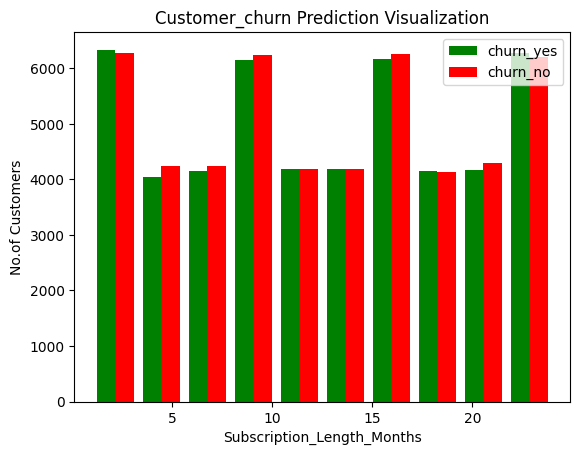

In [ ]:
churn_no=data_set[data_set.Churn==0].Subscription_Length_Months
churn_yes=data_set[data_set.Churn==1].Subscription_Length_Months
plt.title('Customer_churn Prediction Visualization')
plt.xlabel('Subscription_Length_Months')
plt.ylabel('No.of Customers')
plt.hist([churn_yes,churn_no],color=['green','red'],label=['churn_yes','churn_no'])
# plt.hist(figsize=(10,6))
plt.legend()

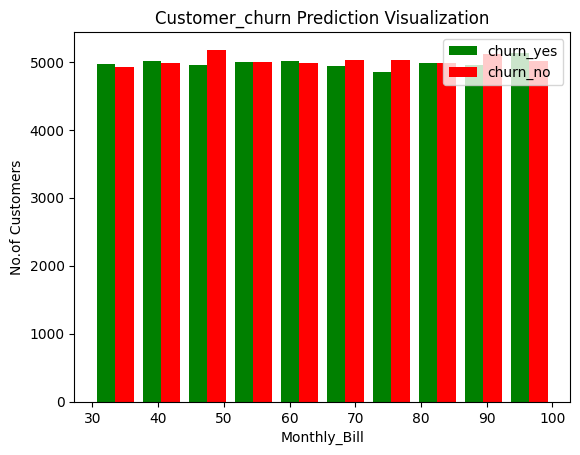

In [ ]:
#Visualization for monthly charges
mc_churn_no=data_set[data_set.Churn==0].Monthly_Bill
mc_churn_yes=data_set[data_set.Churn==1].Monthly_Bill
plt.title('Customer_churn Prediction Visualization')
plt.xlabel('Monthly_Bill')
plt.ylabel('No.of Customers')
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['churn_yes','churn_no'])
# plt.hist(figsize=(10,6))
plt.legend()

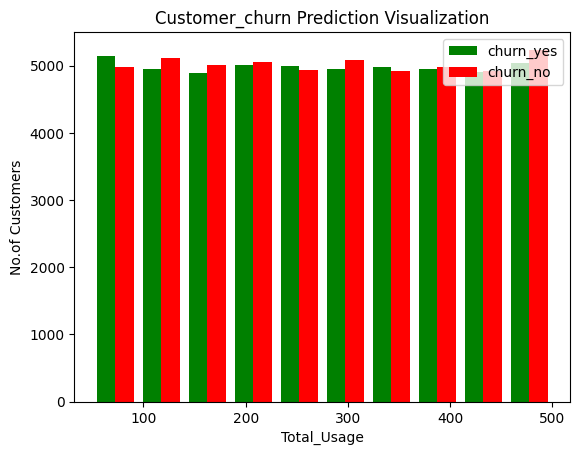

In [ ]:
#Visualization for monthly charges
TU_churn_no=data_set[data_set.Churn==0].Total_Usage_GB
TU_churn_yes=data_set[data_set.Churn==1].Total_Usage_GB
plt.title('Customer_churn Prediction Visualization')
plt.xlabel('Total_Usage')
plt.ylabel('No.of Customers')
plt.hist([TU_churn_yes,TU_churn_no],color=['green','red'],label=['churn_yes','churn_no'])
# plt.hist(figsize=(10,6))
plt.legend()



Label Encoding


In [ ]:
data_set['Gender'].replace({'Female':1,'Male':0},inplace=True)
data_set.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,Customer_1,63,0,Los Angeles,17,73.36,236,0
1,Customer_2,62,1,New York,1,48.76,172,0
2,Customer_3,24,1,Los Angeles,5,85.47,460,0
3,Customer_4,36,1,Miami,3,97.94,297,1
4,Customer_5,46,1,Miami,19,58.14,266,0


In [ ]:
data_set['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

One Hot Encoding


In [ ]:
data_set=pd.get_dummies(data=data_set,columns=['Location'])
data_set.head()

,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,Customer_1,63,0,17,73.36,236,0,0,0,1,0,0
1,Customer_2,62,1,1,48.76,172,0,0,0,0,0,1
2,Customer_3,24,1,5,85.47,460,0,0,0,1,0,0
3,Customer_4,36,1,3,97.94,297,1,0,0,0,1,0
4,Customer_5,46,1,19,58.14,266,0,0,0,0,1,0


In [ ]:
data_set.dtypes

Name                           object
Age                             int64
Gender                          int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Location_Chicago                uint8
Location_Houston                uint8
Location_Los Angeles            uint8
Location_Miami                  uint8
Location_New York               uint8
dtype: object

In [ ]:
data_set.shape

(100000, 12)

## Feature Engineering


In [ ]:
#scaling the columns
cols_scale=['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_set[cols_scale]=scaler.fit_transform(data_set[cols_scale])


In [ ]:
#Customer name is not necessary for model evaluation
data_set.drop('Name',axis='columns',inplace=True)

In [ ]:
data_set.sample(10)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75660,41,0,0.652174,0.905429,0.148889,1,0,0,0,0,1
6318,26,1,0.565217,0.076714,0.706667,1,1,0,0,0,0
89392,53,0,0.000000,0.869857,0.837778,1,0,0,0,0,1
64844,40,0,0.695652,0.536286,0.346667,1,1,0,0,0,0
8028,61,0,0.478261,0.798429,0.460000,1,0,0,0,0,1
47666,30,1,0.695652,0.006143,0.484444,0,1,0,0,0,0
5667,35,0,0.434783,0.719143,0.220000,1,1,0,0,0,0
40965,22,0,0.391304,0.421000,0.802222,1,0,0,1,0,0
49124,69,1,0.260870,0.012714,0.617778,1,0,1,0,0,0
9933,28,0,0.086957,0.986571,0.571111,1,1,0,0,0,0


In [ ]:
x=data_set.drop('Churn',axis='columns')
y=data_set['Churn']

In [ ]:
#applying the train_Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=2)


In [ ]:
print(X_train.shape)

(80000, 10)


In [ ]:
print(X_test.shape)

(20000, 10)


In [ ]:
X_test[::]

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
60743,27,0,0.043478,0.426000,0.697778,0,1,0,0,0
33949,35,0,0.869565,0.247857,0.826667,1,0,0,0,0
52805,63,1,0.217391,0.941571,0.755556,0,0,1,0,0
11804,65,0,0.652174,0.066143,0.020000,0,0,1,0,0
9229,45,1,0.913043,0.904714,0.795556,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10263,48,1,0.347826,0.373143,0.482222,0,0,0,1,0
85435,56,1,0.652174,0.160429,0.137778,1,0,0,0,0
26023,55,0,1.000000,0.423429,0.637778,1,0,0,0,0
18898,32,0,0.695652,0.910286,0.940000,0,0,0,1,0


#Model Building


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(9,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=50, callbacks=[early_stopping])

Epoch 1/50
2344/2344 [==============================] - 5s 2ms/step - loss: 1.3880 - accuracy: 0.5002
Epoch 2/50
2344/2344 [==============================] - 6s 3ms/step - loss: 0.6958 - accuracy: 0.5008
Epoch 3/50
2344/2344 [==============================] - 5s 2ms/step - loss: 0.6938 - accuracy: 0.5014
Epoch 4/50
2344/2344 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.5015
Epoch 5/50
2344/2344 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 6/50
2344/2344 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 7/50
2344/2344 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 8/50
2344/2344 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 9/50
2344/2344 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 10/50
2344/2344 [==============================] - 4s 2ms/step - loss: 0.693